# CLEANING AND VISUALIZING DATA

In [1]:
#stats import now
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#standard seabornimport 
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

In [2]:
dframe = pd.read_csv('frequentation-gares.csv',sep=';')


In [3]:
df = pd.DataFrame(dframe)
df = df.sort_values(by='Total Voyageurs 2017',ascending=False)
#df

In [4]:
srtd_df = df.iloc[1:10]
srtd_df = srtd_df.reset_index(drop=True)
srtd_df

,Nom de la gare,Nb Plate-formes,Nom de la plate-forme,Code UIC,Code postal,Segmentation,Total Voyageurs 2017,Total Voyageurs 2016
0,Paris Gare du Nord,4.0,Paris Gare du Nord Souterrain,271023.0,75010.0,b,135356143,135351137
1,Paris Saint-Lazare,1.0,Paris Saint-Lazare,384008.0,75008.0,a,107875417,107413750
2,Paris Gare de Lyon,2.0,Paris Gare de Lyon Souterrain,686030.0,75012.0,b,56636819,56636860
3,Paris Montparnasse,2.0,Paris Montparnasse Hall 1 & 2,391003.0,75015.0,a,54194496,52072841
4,Paris Gare du Nord,4.0,Paris Gare du Nord Surface Banlieue,271031.0,75010.0,a,51721364,43048806
5,Haussmann Saint-Lazare,1.0,Haussmann Saint-Lazare,281899.0,75009.0,b,44647200,44647200
6,Paris Gare de Lyon,2.0,Paris Gare de Lyon Hall 1 & 2,686006.0,75012.0,a,43923693,42756699
7,Magenta,1.0,Magenta,281873.0,75010.0,b,41256000,41256000
8,Juvisy,1.0,Juvisy,545244.0,91260.0,b,38195637,33427524


In [5]:
compa_df = DataFrame(srtd_df,columns=['Nom de la plate-forme','Total Voyageurs 2017'])
compa_df1 = DataFrame(srtd_df,columns=['Nom de la plate-forme','Total Voyageurs 2016'])

# COMPARING AND VISUALIZING DATA

[Text(0, 0.5, ''), Text(0.5, 0, 'Total number of Passengers')]

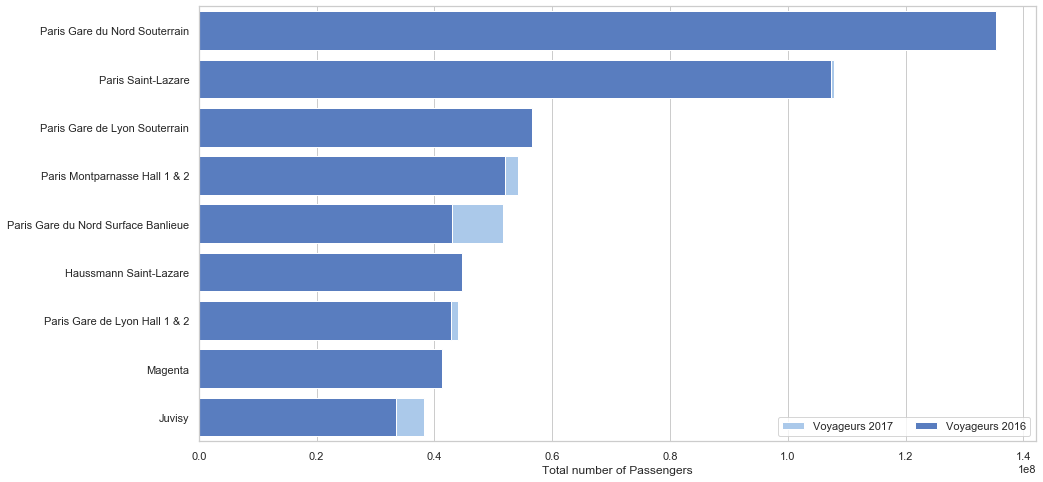

In [6]:
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 8))
sns.set_color_codes("pastel")
sns.barplot(x="Total Voyageurs 2017", y="Nom de la plate-forme", data=compa_df,label="Voyageurs 2017", color="b")
sns.set_color_codes("muted")
sns.barplot(x="Total Voyageurs 2016", y="Nom de la plate-forme", data=compa_df1,label="Voyageurs 2016", color="b")
sns.set_color_codes("muted")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="",xlabel="Total number of Passengers")

[Text(0, 0.5, ''), Text(0.5, 0, 'Total number of Passengers')]

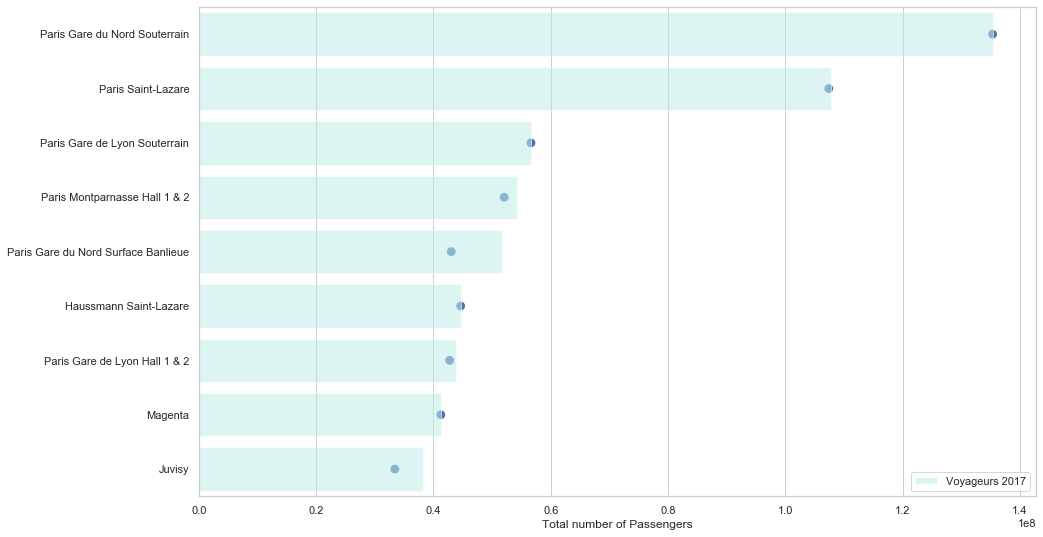

In [7]:
f, ax = plt.subplots(figsize=(15, 9))
sns.set_color_codes("pastel")
sns.barplot(x="Total Voyageurs 2017", y="Nom de la plate-forme", data=compa_df,label="Voyageurs 2017", color="c",alpha = .55 )
sns.pointplot(x="Total Voyageurs 2016", y="Nom de la plate-forme", data=compa_df1,join=False)
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="",xlabel="Total number of Passengers")

In [8]:
# Read in csv
df = pd.read_csv('Stations paris.csv')

In [9]:
import matplotlib.pyplot as plt
# Pie chart
Stations = df['Station']
Passengers = df['Voyageurs2017']
Passengers16 = df['Voyageurs2016']

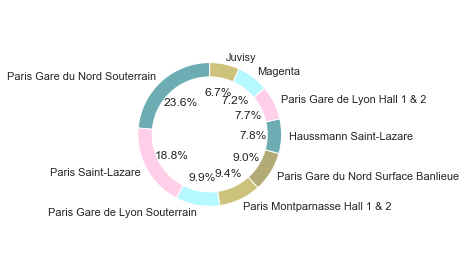

In [10]:
#colors
colors = ['#6DACB3','#FFCFE9','#B5F8FF','#CCC27C','#B3AB76']
colors1 = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
fig1, ax1 = plt.subplots()
ax1.pie(Passengers, colors = colors, labels=Stations, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()



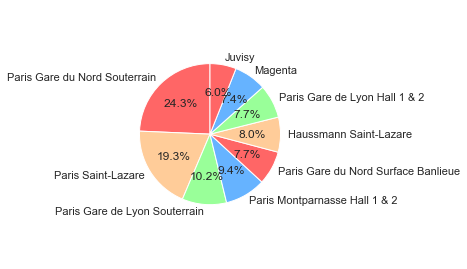

In [11]:
fig1, ax1 = plt.subplots()
ax1.pie(Passengers16, colors = colors1, labels=Stations, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((50,0),0.90,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

# INTERACTIVE GRAPH

In [12]:
from bokeh.plotting import figure, output_file, show, save, ColumnDataSource
from bokeh.models.tools import HoverTool
from bokeh.transform import factor_cmap
from bokeh.palettes import Blues8
from bokeh.embed import components
import pandas as pd

# Read in csv
df = pd.read_csv('Stations paris.csv')
df

,Station,postalcode,Segmentation,Voyageurs2017,Voyageurs2016
0,Paris Gare du Nord Souterrain,75010,B,135356143,135351137
1,Paris Saint-Lazare,75008,A,107875417,107413750
2,Paris Gare de Lyon Souterrain,75012,B,56636819,56636860
3,Paris Montparnasse Hall 1 & 2,75015,A,54194496,52072841
4,Paris Gare du Nord Surface Banlieue,75010,A,51721364,43048806
5,Haussmann Saint-Lazare,75009,B,44647200,44647200
6,Paris Gare de Lyon Hall 1 & 2,75012,A,43923693,42756699
7,Magenta,75010,B,41256000,41256000
8,Juvisy,91260,B,38195637,33427524


In [13]:
# Create ColumnDataSource from data frame
source = ColumnDataSource(df)

output_file('SNCF.html')

In [14]:
# Station list
Station_list = source.data['Station'].tolist()

In [15]:
# Add plot
p = figure(
    y_range=Station_list,
    plot_width=1000,
    plot_height=500,
    title='PASSENGER STATISTICS',
    x_axis_label='Number of Passengers',
    tools="pan,box_select,zoom_in,zoom_out,save,reset"

)
#show(p)


In [16]:
# Render glyph
p.hbar(
    y='Station',
    right='Voyageurs2017',
    left=0,
    height=0.5,
    fill_color=factor_cmap('Station',palette=Blues8,factors=Station_list),
    fill_alpha=0.9,
    source=source,
    legend='Station'
)

# Adding Legend
p.legend.orientation = 'vertical'
p.legend.location = 'top_right'
p.legend.label_text_font_size = '7px'

C:\Users\DbD.DESKTOP-C57TPKC\Anaconda3\lib\site-packages\bokeh\models\mappers.py:140: UserWarning: Palette length does not match number of factors. ['Juvisy'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


In [17]:
# Add Tooltips
hover = HoverTool()
hover.tooltips = """
  <div>
    <h3>@Station</h3>
    <div><strong>PostCode: </strong>@postalcode</div>
    <div><strong>Line: </strong>@Segmentation</div>
    <div><strong>Number of Passengers in 2016: </strong>@Voyageurs2016</div>
  </div>
"""
p.add_tools(hover)
show(p)
# Show results


# Run The Above Code To Visualize The Interactive Graph

# MAPPING STATION LOCATIONS

In [19]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import point, polygon

In [20]:
paris = gpd.read_file('paris.geojson')

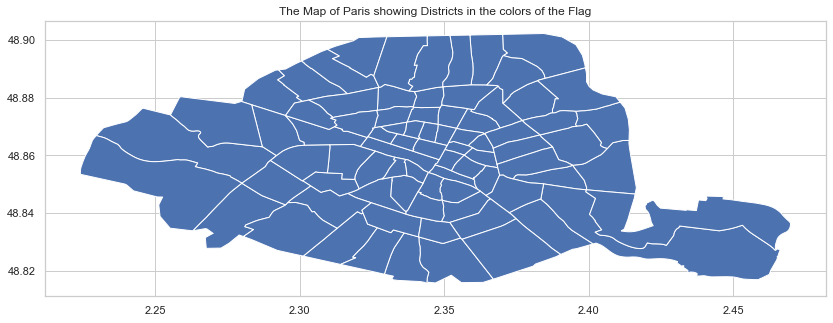

In [45]:
#Test Plotting data, ie Paris map
fig, ax = plt.subplots(figsize=(14,14))
plt.title('The Map of Paris showing Districts in the colors of the Flag')
paris.plot(ax=ax)

In [22]:
import pgeocode

In [23]:
pcode=DataFrame(df,columns=['postalcode'])
pcode

,postalcode
0,75010
1,75008
2,75012
3,75015
4,75010
5,75009
6,75012
7,75010
8,91260


In [24]:
#covert to list to use in pgeocode library

In [25]:
pcde=pcode.values.tolist()
pcde

[[75010],
 [75008],
 [75012],
 [75015],
 [75010],
 [75009],
 [75012],
 [75010],
 [91260]]

In [26]:
#nomi = pgeocode.Nominatim('fr')
#p_code=nomi.query_postal_code(df.postalcode)
#p_code

In [43]:
#converting postcode data to coordinates to visualize station locations
nomi = pgeocode.Nominatim('fr')
p_code=nomi.query_postal_code(['75010','75008','75012','75015','75010','75009','75012','75010','91260'])
p_code


,postal_code,country code,place_name,state_name,state_code,county_name,county_code,community_name,community_code,latitude,longitude,accuracy
0,75010,FR,"Paris 10, Paris",Île-de-France,11.0,Paris,75,Paris,751,48.8709,2.35245,5
1,75008,FR,"Paris 08, Paris",Île-de-France,11.0,Paris,75,Paris,751,48.8763,2.33355,5
2,75012,FR,"Paris 12, Paris",Île-de-France,11.0,Paris,75,Paris,751,48.8412,2.36820,5
3,75015,FR,"Paris 15, Paris",Île-de-France,11.0,Paris,75,Paris,751,48.8412,2.32455,5
4,75010,FR,"Paris 10, Paris",Île-de-France,11.0,Paris,75,Paris,751,48.8709,2.35245,5
5,75009,FR,"Paris 09, Paris",Île-de-France,11.0,Paris,75,Paris,751,48.8718,2.34435,5
6,75012,FR,"Paris 12, Paris",Île-de-France,11.0,Paris,75,Paris,751,48.8412,2.36820,5
7,75010,FR,"Paris 10, Paris",Île-de-France,11.0,Paris,75,Paris,751,48.8709,2.35245,5
8,91260,FR,Juvisy-sur-Orge,Île-de-France,11.0,Essonne,91,Arrondissement de Palaiseau,913,48.6833,2.38330,5


In [44]:
coord=DataFrame(p_code,columns=['latitude','longitude'])
coord

,latitude,longitude
0,48.8709,2.35245
1,48.8763,2.33355
2,48.8412,2.36820
3,48.8412,2.32455
4,48.8709,2.35245
5,48.8718,2.34435
6,48.8412,2.36820
7,48.8709,2.35245
8,48.6833,2.38330


In [29]:
gdf = gpd.GeoDataFrame(coord, geometry=gpd.points_from_xy(coord.longitude, coord.latitude))
gdf

,latitude,longitude,geometry
0,48.8709,2.35245,POINT (2.35245 48.87090)
1,48.8763,2.33355,POINT (2.33355 48.87630)
2,48.8412,2.36820,POINT (2.36820 48.84120)
3,48.8412,2.32455,POINT (2.32455 48.84120)
4,48.8709,2.35245,POINT (2.35245 48.87090)
5,48.8718,2.34435,POINT (2.34435 48.87180)
6,48.8412,2.36820,POINT (2.36820 48.84120)
7,48.8709,2.35245,POINT (2.35245 48.87090)
8,48.6833,2.38330,POINT (2.38330 48.68330)


In [30]:
ax = paris.plot(ax=ax)
gdf.plot(ax=ax, color='red')
plt.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
paris = gpd.read_file('paris.geojson')

In [ ]:
fig, ax = plt.subplots(figsize=(14,14))
paris.plot(ax=ax)

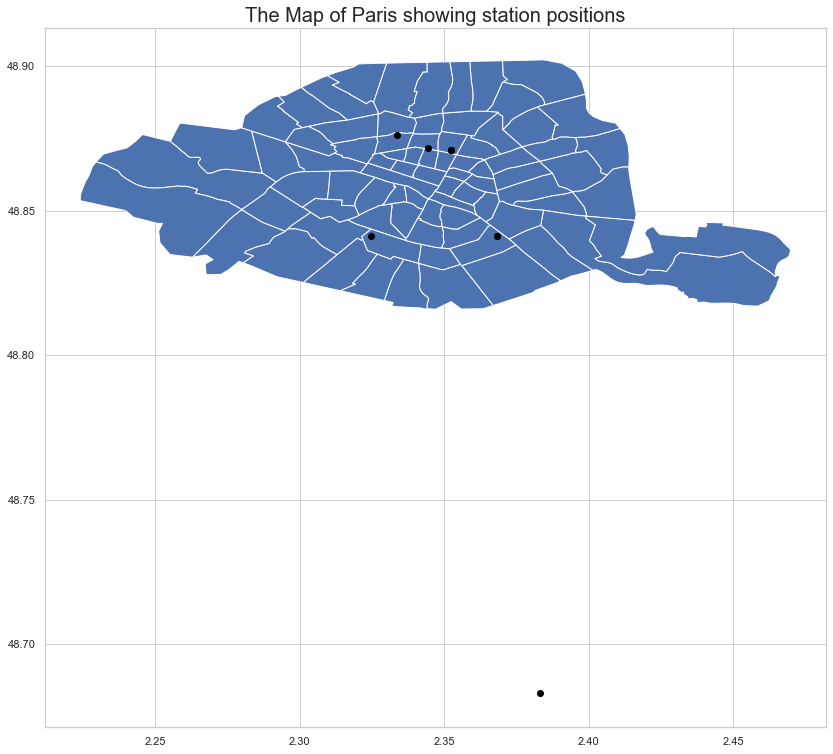

In [41]:
fig, ax = plt.subplots(figsize=(14,14))
plt.title('The Map of Paris showing station positions',fontsize = 20)
ax = paris.plot(ax=ax)
gdf.plot(ax=ax, color='black')
plt.show()

In [42]:
# one station is outside paris!

In [47]:
#tHE ABOVE CODE USES THE FOLLOWING LIBRARIES
pandas 
geopandas
matplotlib
descartes
shapely
seaborne
numpy
pgeocode
bokeh